In [1]:
!pip install pygam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 2.6 MB/s eta 0:00:00


In [2]:
pip install --upgrade scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [3]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn models & preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# GAM library
from pygam import LinearGAM, s, f

#Deep learning models for regression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [4]:
 retaildata = pd.read_csv('https://raw.githubusercontent.com/Dinahak/retail_dataset/refs/heads/main/retail_data_project.csv')
 retailtest = pd.read_csv('https://raw.githubusercontent.com/Dinahak/retail_dataset/refs/heads/main/retail-data-testing.csv')
 retaildata.head()


,Product_Price,Promotion,Product_Category,Store_Location,Shelf_Space,Competitor_Price,Season,Day_of_Week,Units_in_Inventory,Online_Sales,Week_of_Year,units_sold
0,14.23,0,Food,Rural,14.98,14.75,Winter,Tue,113,0,4,84
1,12.29,0,Clothing,Rural,17.49,11.79,Fall,Fri,88,0,40,112
2,14.78,0,Electronics,Suburban,10.10,15.35,Fall,Sun,151,0,11,104
3,16.75,0,Food,Suburban,13.36,17.81,Spring,Tue,147,1,13,97
4,13.37,0,Food,Suburban,4.54,11.48,Winter,Wed,115,0,14,101


**Introduction**

The retail dataset shows sales performance recorded across various stores.
it tracks products on shelves ,sale prices ,promotions and even hoe many items a store has left in stock.

In [5]:
#Variable description
variable_description = pd.read_csv('https://raw.githubusercontent.com/Dinahak/retail_dataset/refs/heads/main/Variable%20Description..csv')
variable_description

,Variable,Description,Measurement Type,Example Values,Potential Role
0,Product_Price,Price of product in store,Continuous,"14.23, 16.75",Predictor
1,Promotion,Is there a promotion on this product?,Binary (0/1),"0, 1",Predictor
2,Product_Category,Product type,Nominal (Categorical),"Food, Clothing, Electronics",Predictor
3,Store_Location,Type/location of store,Nominal (Categorical),"Rural, Urban, Suburban",Predictor
4,Shelf_Space,"Physical shelf space (sq. ft/meters, etc.)",Continuous,"4.54, 23.27",Predictor
5,Competitor_Price,Price for comparable product at competitor,Continuous,"13.21, 14.86",Predictor
6,Season,Current season,Nominal (Categorical),"Fall, Spring, Summer, Winter",Predictor
7,Day_of_Week,Day of the week,Nominal (Categorical),"Mon, Tue, Wed, etc.",Predictor
8,Units_in_Inventory,Units of product currently in inventory,Discrete (Count),"88, 263",Predictor
9,Online_Sales,If the product is also sold online (0/1),Binary (0/1),"0, 1",Predictor


Exploratory Analysis.


In [6]:
retaildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_Price       8000 non-null   float64
 1   Promotion           8000 non-null   int64  
 2   Product_Category    8000 non-null   object 
 3   Store_Location      8000 non-null   object 
 4   Shelf_Space         8000 non-null   float64
 5   Competitor_Price    8000 non-null   float64
 6   Season              8000 non-null   object 
 7   Day_of_Week         8000 non-null   object 
 8   Units_in_Inventory  8000 non-null   int64  
 9   Online_Sales        8000 non-null   int64  
 10  Week_of_Year        8000 non-null   int64  
 11  units_sold          8000 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 750.1+ KB


In [7]:
retailtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_Price       2000 non-null   float64
 1   Promotion           2000 non-null   int64  
 2   Product_Category    2000 non-null   object 
 3   Store_Location      2000 non-null   object 
 4   Shelf_Space         2000 non-null   float64
 5   Competitor_Price    2000 non-null   float64
 6   Season              2000 non-null   object 
 7   Day_of_Week         2000 non-null   object 
 8   Units_in_Inventory  2000 non-null   int64  
 9   Online_Sales        2000 non-null   int64  
 10  Week_of_Year        2000 non-null   int64  
 11  units_sold          2000 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 187.6+ KB


In [8]:
retaildata.columns = retaildata.columns.str.lower()
retailtest.columns = retailtest.columns.str.lower()


In [9]:
# Convert variable types
categorical_cols = ['promotion', 'product_category', 'store_location',
                    'season', 'day_of_week', 'week_of_year']

for col in categorical_cols:
    retaildata[col] = retaildata[col].astype('category')

retaildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   product_price       8000 non-null   float64 
 1   promotion           8000 non-null   category
 2   product_category    8000 non-null   category
 3   store_location      8000 non-null   category
 4   shelf_space         8000 non-null   float64 
 5   competitor_price    8000 non-null   float64 
 6   season              8000 non-null   category
 7   day_of_week         8000 non-null   category
 8   units_in_inventory  8000 non-null   int64   
 9   online_sales        8000 non-null   int64   
 10  week_of_year        8000 non-null   category
 11  units_sold          8000 non-null   int64   
dtypes: category(6), float64(3), int64(3)
memory usage: 425.5 KB


In [10]:
retaildata['Promotion_Status'] = retaildata['promotion'].map({0: 'No Promotion', 1: 'Promotion Active'})
retaildata['Sales_Performance_Level'] = pd.qcut(retaildata['units_sold'],
                                                q=3,
                                                labels=['Low', 'Medium', 'High'])

<Axes: xlabel='Promotion_Status', ylabel='units_sold'>

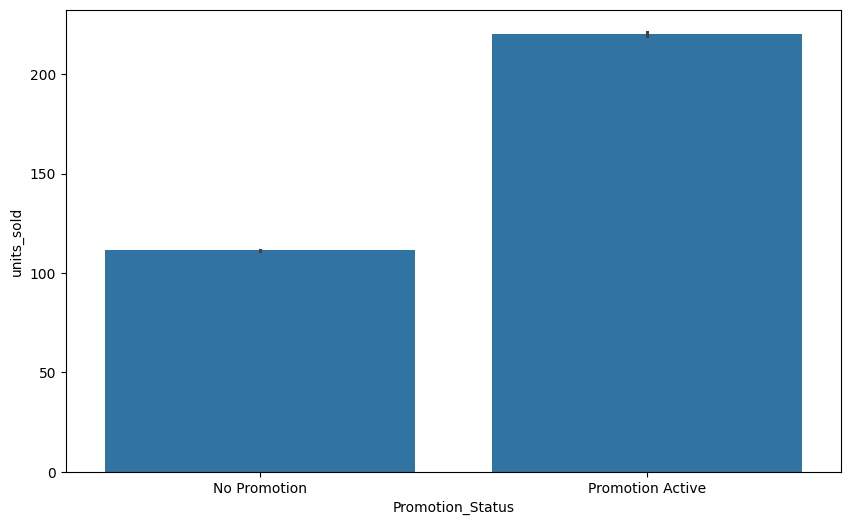

In [11]:
#bivariate analysis
#units sold vs promotion status
plt.figure(figsize=(10, 6))
sns.barplot(x='Promotion_Status', y='units_sold', data=retaildata)

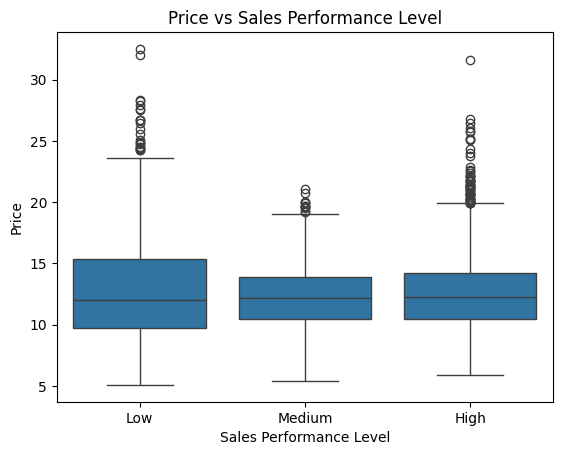

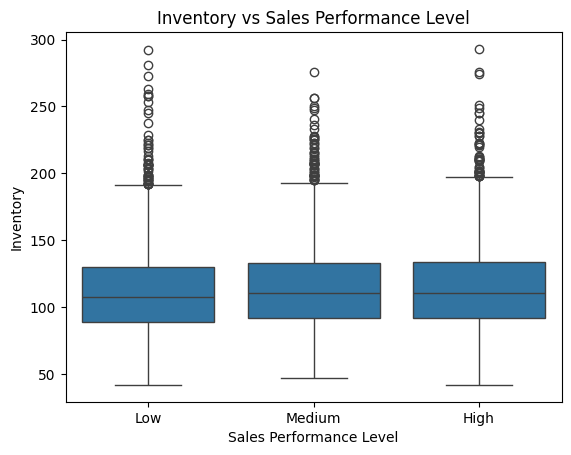

In [ ]:
# Boxplot: Price by Sales Performance Level
sns.boxplot(x='Sales_Performance_Level', y='product_price', data=retaildata)
plt.title('Price vs Sales Performance Level')
plt.xlabel('Sales Performance Level')
plt.ylabel('Price')
plt.show()

# Boxplot: Inventory by Sales Performance Level
sns.boxplot(x='Sales_Performance_Level', y='units_in_inventory', data=retaildata)
plt.title('Inventory vs Sales Performance Level')
plt.xlabel('Sales Performance Level')
plt.ylabel('Inventory')
plt.show()

# Scatterplot: Price vs Inventory colored by Sales Performance
sns.scatterplot(x='product_price', y='units_in_inventory', hue='Sales_Performance_Level', data=retaildata)
plt.title('Inventory vs Price by Sales Performance Level')
plt.xlabel('Price')
plt.ylabel('Inventory')
plt.show()

In [ ]:
# Count unique values in each column
low_var = retaildata.nunique().sort_values()
print("Columns with low variability:")
print(low_var[low_var <= 1])


In [ ]:
corr_matrix = retaildata.select_dtypes(include=np.number).corr()
display(corr_matrix)

product_price and competitor_price: Correlation of
0.94

0.94 suggests these two prices move almost in tandem if product price goes up, competitor price tends to go up as well.

one may be excluded to reduce multicollinearity in predictive modeling


In [ ]:
# Set correlation threshold (commonly 0.85 or 0.9)
threshold = 0.85

# Find correlated pairs
high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Variable1', 'level_1': 'Variable2', 0: 'Correlation'})
)

# Filter only high correlations
high_corr_pairs = high_corr_pairs[abs(high_corr_pairs['Correlation']) > threshold]

print("Highly correlated variable pairs (|r| > 0.85):")
print(high_corr_pairs)


In [ ]:
# Drop the 'Competitor_Price' column
retaildata = retaildata.drop(columns=['competitor_price'])

# Confirm the column is removed
retaildata.columns

Correlation Matrix: Standardizing is not necessary before computing a correlation matrix. The correlation coefficient itself is scale-invariant since it standardizes the variables internally, so centering and scaling would not change matrix values.

If the analysis is just for examining the correlation matrix, centering and scaling are not needed because the correlation values are already unitless and standardized.

For modeling or more advanced analysis (e.g., PCA, k-means, regression with interactions), centering and scaling should generally be done to address scale differences and collinearity

**Building Predictive Models**

In [ ]:
#separate features and target
x= retaildata.drop(columns=['units_sold'])
y= retaildata['units_sold']

#identify cat and numerical cols
categorical_cols = x.select_dtypes(include='category').columns.tolist()
numeric_cols = x.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

Parametric Model

In [ ]:
# Build pipeline
mlrpipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
mlrpipeline.fit(x_train, y_train)

y_pred = mlrpipeline.predict(x_test)
print("MLR r2:",r2_score(y_test, y_pred))
print("MLR RMSE:",mean_squared_error(y_test, y_pred))
print


In [ ]:
# LASSO with cross-validation
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LassoCV(cv=5, random_state=42))
])

lasso_pipeline.fit(x_train, y_train)

# Coefficients after preprocessing
feature_names = numeric_cols + list(lasso_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_pipeline.named_steps['regressor'].coef_})
print(coef_df.sort_values(by='Coefficient', key=abs, ascending=False))

# Performance
y_pred_lasso = lasso_pipeline.predict(x_test)
print("LASSO R²:", r2_score(y_test, y_pred_lasso))
print("LASSO RMSE:", mean_squared_error(y_test, y_pred_lasso))


In [ ]:
numeric_cols_no_target = [col for col in numeric_cols if col != 'units_sold']

for col in numeric_cols_no_target:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=retaildata[col], y=retaildata['units_sold'])
    sns.regplot(x=retaildata[col], y=retaildata['units_sold'], lowess=True, scatter=False, color='red')
    plt.title(f'{col} vs Units Sold')
    plt.show()


In [ ]:
# Example: Product_Price and Shelf_Space show nonlinear effects, Promotion_Status categorical
X_gam = retaildata[['product_price', 'shelf_space', 'Promotion_Status']].copy()
X_gam = pd.get_dummies(X_gam, drop_first=True)
y_gam = retaildata['units_sold']

# Fit GAM
gam = LinearGAM(s(0) + s(1) + f(2))  # 0=Product_Price, 1=Shelf_Space, 2=Promotion_Status
gam.fit(X_gam, y_gam)

# Partial dependence plots
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.figure()
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=0.95)[1], c='r', ls='--')
    plt.title(f'Partial Dependence: {X_gam.columns[i]}')
    plt.show()

Non Parametric Model


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Preprocessed features using your existing preprocessor
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_proc, y_train)

# Predict
y_pred_rf = rf.predict(X_test_proc)

# Evaluate
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# Feature importance
importances = rf.feature_importances_
feature_names = numeric_cols + list(preprocessor.transformers_[1][1].get_feature_names_out())
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feat_imp)

In [ ]:
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assume 'x', 'y', and 'preprocessor' are defined in previous cells and are accessible

# Train/test split (regenerate within this cell's scope)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)


xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=300,      # number of trees
        learning_rate=0.05,    # step size shrinkage
        max_depth=6,           # depth of each tree
        subsample=0.8,         # sample ratio of training instances
        colsample_bytree=0.8,  # sample ratio of columns per tree
        reg_alpha=0.1,         # L1 regularization
        reg_lambda=1.0,        # L2 regularization
        random_state=42
    ))
])

# ----------------------------
# 4. Train and Evaluate
# ----------------------------
# Use the original X_train and X_test DataFrames for the pipeline fit method
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost R²:", r2)
print("XGBoost RMSE:", rmse)

# ----------------------------
# 5. Feature Importance
xgb_model = xgb_pipeline.named_steps['model']

plt.figure(figsize=(10, 6))
# Use the preprocessed data for plotting feature importance if needed by plot_importance,
# otherwise use the trained model directly with feature names.
# Assuming plot_importance works with the fitted model directly:
feature_names = numeric_cols + list(preprocessor.transformers_[1][1].get_feature_names_out())
xgb_model.get_booster().feature_names = feature_names # Set feature names for plotting
plot_importance(xgb_model, max_num_features=10, importance_type='gain', title='Top 10 Feature Importances')
plt.show()

Both Random Forest and XGBoost achieved excellent predictive performance (R² ≈ 0.98).

The Random Forest model slightly outperformed XGBoost in terms of RMSE, indicating marginally more accurate predictions.

Given its simplicity, robustness, and minimal tuning requirements, Random Forest is the preferred ensemble model for this dataset.

SVM


In [ ]:
from sklearn.svm import SVR
svr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))
])

# Train
svr_pipeline.fit(X_train, y_train)

# Predictions
y_pred_svr = svr_pipeline.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred_svr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print("SVM (RBF Kernel) R²:", r2)
print("SVM (RBF Kernel) RMSE:", rmse)

Based on bivariate plots between predictors (e.g., Product_Price, Shelf_Space) and the outcome variable (units_sold), the relationships appeared non-linear.
Therefore, an SVM with a Radial Basis Function (RBF) kernel was selected.
The RBF kernel allows the model to capture complex non-linear patterns by mapping features into a higher-dimensional space, leading to improved accuracy compared to linear or polynomial kernels.

In [ ]:
svr_linear_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVR(kernel='linear', C=1.0, epsilon=0.1))
])

# Train
svr_linear_pipeline.fit(X_train, y_train)

# Predictions
y_pred_linear = svr_linear_pipeline.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred_linear)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print("SVM (Linear Kernel) R²:", r2)
print("SVM (Linear Kernel) RMSE:", rmse)

**A deep learning network model.**


In [ ]:
# Define architecture
# The input shape should be the number of features AFTER preprocessing
n_input = preprocessor.fit_transform(X_train).shape[1]
n_hidden = 2 * n_input          # 1 hidden layer with 2x input nodes

# Build model
model = Sequential([
    Dense(n_hidden, activation='relu', input_shape=(n_input,)),  # Hidden layer
    Dense(1, activation='linear')  # Output layer (Linear activation for regression)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Preprocess the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Train model
history = model.fit(X_train_processed, y_train, validation_split=0.2, epochs=100, batch_size=16, verbose=0)

# Predict and evaluate
y_pred = model.predict(X_test_processed).flatten()
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Deep Learning Model (1 Hidden Layer)")
print("R²:", r2)
print("RMSE:", rmse)

PCA

In this dataset which includes both numeric (e.g., Product_Price, Promotion, Shelf_Space) and categorical variables (e.g., Product_Category, Store_Location, Season), directly applying Principal Component Analysis (PCA) is not ideal. PCA is designed for continuous numeric data and requires predictors to have meaningful linear relationships, which categorical variables lack unless properly encoded. Additionally, the modest number of predictors (around 10-12) reduces the typical benefits of dimensionality reduction. Applying PCA to one-hot encoded categorical data can produce components that are difficult to interpret because they mix unrelated category levels. However, PCA can be useful if applied solely to the numeric subset of predictors with strong correlations (e.g., between Product_Price and Competitor_Price). In such cases, standardizing these numeric predictors before PCA helps extract principal components that explain most variance and reduce multicollinearity in subsequent modeling, improving model simplicity but potentially sacrificing interpretability.

Cluster Analysis

Using cluster analysis in your retail data model analysis can make sense if there is a rationale to believe that natural groupings or segments exist within your data such as products, stores, or time periods exhibiting similar patterns across predictors like product price, promotion, shelf space, and season. If you aim to identify meaningful customer or product segments that behave similarly, cluster analysis can provide valuable insights that complement supervised predictive models.

However, it is important to consider that your data includes categorical variables (e.g., Season, Day_of_Week), which may complicate traditional distance-based clustering methods like K-Means unless properly encoded. Additionally, if your dataset already has well-defined groups (such as product categories or store locations), clustering may yield limited additional benefit.

In summary, cluster analysis is recommended only if you suspect hidden groupings in the numeric or suitably encoded features, and if you plan to incorporate cluster memberships as additional features in your predictive models to capture local patterns and improve performance. If these conditions are not met, clustering may not add substantial value to your analysis.


**Assesing Model Performance**

**Using kfold 10**


In [ ]:
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(max_iter=10000))
])

# Set up Cross-Validation and Hyperparameter Grid

param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=lasso_pipeline,
    param_grid=param_grid,
    cv=kfold,
    scoring='neg_root_mean_squared_error',  # RMSE
    n_jobs=-1
)

grid_search.fit(x, y)

print("Best Alpha:", grid_search.best_params_['regressor__alpha'])
print("Best CV RMSE:", -grid_search.best_score_)

Using 10-fold cross-validation, the optimal LASSO model uses an alpha of 0.01, indicating mild regularization.
The cross-validated RMSE of 13.20 suggests that the model generalizes well and captures most of the variance in units_sold while avoiding overfitting.

In [ ]:
import numpy as np
import random
import tensorflow as tf
SEED = 42
np.random.seed(SEED)         # For NumPy
random.seed(SEED)            # For Python built-in random
tf.random.set_seed(SEED)     # For TensorFlow / Keras

In [ ]:
# Separate predictors and outcome (if outcome exists)
# Assuming 'units_sold' is present in the test set as the target variable
# Keep 'Promotion_Status' and 'Sales_Performance_Level' in X_test as they are needed by the preprocessor
X_test = retailtest.drop(columns=['units_sold', 'competitor_price'], errors='ignore')
y_test = retailtest['units_sold'] if 'units_sold' in retailtest.columns else None

# Create 'Promotion_Status' and 'Sales_Performance_Level' columns in retailtest
# Ensure these columns are created consistently with the training data
retailtest['Promotion_Status'] = retailtest['promotion'].map({0: 'No Promotion', 1: 'Promotion Active'})
retailtest['Sales_Performance_Level'] = pd.qcut(retailtest['units_sold'],
                                                q=3,
                                                labels=['Low', 'Medium', 'High'],
                                                duplicates='drop') # Added duplicates='drop' to handle potential issues with quantiles

# Prepare X_test for preprocessing, including the new categorical columns
# X_test_for_preprocessing should already contain the necessary columns from the previous step
X_test_for_preprocessing = X_test.copy()
X_test_for_preprocessing['Promotion_Status'] = retailtest['Promotion_Status']
X_test_for_preprocessing['Sales_Performance_Level'] = retailtest['Sales_Performance_Level']


# Preprocess the test data using the same preprocessor as training
# Note: Some pipelines handle preprocessing internally, others require preprocessed data.
# We will use the appropriate X_test for each model prediction.
X_test_processed = preprocessor.transform(X_test_for_preprocessing)


# ----------------------------
# Example: Random Forest
# The rf model was trained on X_train_proc which was preprocessed
y_pred_rf = rf.predict(X_test_processed)
if y_test is not None:
    print("Random Forest R²:", r2_score(y_test, y_pred_rf))
    print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# ----------------------------
# Example: XGBoost
# The xgb_pipeline was trained on the original X_train (non-preprocessed)
# Use the original X_test DataFrame for prediction with xgb_pipeline
y_pred_xgb = xgb_pipeline.predict(X_test)
if y_test is not None:
    print("XGBoost R²:", r2_score(y_test, y_pred_xgb))
    print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

# ----------------------------
# Example: LASSO
# The lasso_pipeline was fitted during the grid search.
# Use the best estimator from the grid search for prediction on the original X_test
y_pred_lasso = grid_search.best_estimator_.predict(X_test)
if y_test is not None:
    print("LASSO R²:", r2_score(y_test, y_pred_lasso))
    print("LASSO RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

# ----------------------------
# Example: SVR (RBF Kernel)
# The svr_pipeline was trained on the original X_train (non-preprocessed)
# Use the original X_test DataFrame for prediction with svr_pipeline
y_pred_svr_rbf = svr_pipeline.predict(X_test)
if y_test is not None:
    print("SVR (RBF Kernel) R²:", r2_score(y_test, y_pred_svr_rbf))
    print("SVR (RBF Kernel) RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr_rbf)))


# ----------------------------
# Example: SVR (Linear Kernel)
# The svr_linear_pipeline was trained on the original X_train (non-preprocessed)
# Use the original X_test DataFrame for prediction with svr_linear_pipeline
y_pred_svr_linear = svr_linear_pipeline.predict(X_test)
if y_test is not None:
    print("SVR (Linear Kernel) R²:", r2_score(y_test, y_pred_svr_linear))
    print("SVR (Linear Kernel) RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr_linear)))

# ----------------------------
# Example: Neural Network
# The 'model' was trained on X_train_processed which was preprocessed
y_pred_nn = model.predict(X_test_processed).flatten()
if y_test is not None:
    print("Neural Network R²:", r2_score(y_test, y_pred_nn))
    print("Neural Network RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))

In [ ]:
# Recalculate numeric_cols for both dataframes to ensure consistency
numeric_cols_train = retaildata.select_dtypes(include=np.number).columns.tolist()
numeric_cols_test = retailtest.select_dtypes(include=np.number).columns.tolist()

# Ensure 'units_sold' is not in the list of predictors for correlation calculation
if 'units_sold' in numeric_cols_train:
    numeric_cols_train.remove('units_sold')
if 'units_sold' in numeric_cols_test:
    numeric_cols_test.remove('units_sold')


print('Training correlations:\n', retaildata[numeric_cols_train + ['units_sold']].corr()['units_sold'])
print('Testing correlations:\n', retailtest[numeric_cols_test + ['units_sold']].corr()['units_sold'])

In [ ]:
# Separate numeric and categorical columns
numeric_cols = retaildata.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'units_sold']  # Exclude target
categorical_cols = retaildata.select_dtypes(include=['object']).columns.tolist()

print("\n=== Data Drift Analysis ===\n")

for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.kdeplot(retaildata[col], label='Training', fill=True)
    sns.kdeplot(retailtest[col], label='Testing', fill=True)
    plt.title(f'Distribution Comparison: {col}')
    plt.legend()
    plt.show()

for col in categorical_cols:
    print(f'\nCategory frequencies for {col}:')
    print('Training:\n', retaildata[col].value_counts(normalize=True))
    print('Testing:\n', retailtest[col].value_counts(normalize=True))

# Optional: Quantitative check using KL divergence or JS divergence for numeric features
from scipy.stats import entropy

for col in numeric_cols:
    train_hist, bin_edges = np.histogram(retaildata[col], bins=30, density=True)
    test_hist, _ = np.histogram(retailtest[col], bins=bin_edges, density=True)
    train_hist += 1e-8  # avoid zero
    test_hist += 1e-8
    kl_div = entropy(train_hist, test_hist)
    print(f"KL divergence for {col}: {kl_div:.4f}")

# -------------------------------
# 2. Check Concept Drift (if target exists in test)
# -------------------------------
if 'units_sold' in retailtest.columns:
    print("\n=== Concept Drift Analysis ===\n")

    for col in numeric_cols:
        plt.figure(figsize=(6,4))
        plt.scatter(retaildata[col], retaildata['units_sold'], alpha=0.3, label='Training')
        plt.scatter(retailtest[col], retailtest['units_sold'], alpha=0.3, label='Testing')
        plt.title(f'{col} vs units_sold')
        plt.xlabel(col)
        plt.ylabel('units_sold')
        plt.legend()
        plt.show()

        # Compare correlations
        corr_train = retaildata[[col, 'units_sold']].corr().iloc[0,1]
        corr_test = retailtest[[col, 'units_sold']].corr().iloc[0,1]
        print(f'Correlation {col}-units_sold: Training={corr_train:.3f}, Testing={corr_test:.3f}')

    print("\nInterpretation:")
    print("- Large differences in distributions → Data drift")
    print("- Large differences in correlations or scatter plots → Concept drift")
else:
    print("\nTarget variable not in testing set. Only data drift can be assessed.")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential # Import Sequential if not already

# Function to compute adjusted R²
def adjusted_r2(r2, n, p):
    # Check if n - p - 1 is not zero or negative to avoid division by zero or invalid results
    if (n - p - 1) <= 0:
        return np.nan # Or some other indicator of invalid adjusted R2
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Prepare results list
results = []

# List of models with their names and trained objects/pipelines
# Ensure these match the actual variable names of your trained models
models_to_evaluate = [
    ('Random Forest', rf), # rf was trained on preprocessed data
    ('XGBoost', xgb_pipeline), # xgb_pipeline was trained on original data
    ('LASSO', grid_search.best_estimator_), # best_estimator_ is a pipeline, trained on original data
    ('SVR (RBF)', svr_pipeline), # svr_pipeline was trained on original data
    ('SVR (Linear)', svr_linear_pipeline), # svr_linear_pipeline was trained on original data
    ('Neural Network', model) # model was trained on preprocessed data
]

# Number of predictors used for adjusted R² calculation
# This should be the number of features AFTER preprocessing for models that use it,
# or the number of features in the original data for models that handle categorical features internally or were trained on non-preprocessed data.
# Let's use the number of features after preprocessing for consistency, as most models benefit from or require it.
p = preprocessor.transform(X_train).shape[1] # Number of features after preprocessing

# Evaluate each model
for name, trained_model_or_pipeline in models_to_evaluate:
    # Determine which X_test to use based on how the model was trained
    if name in ['Random Forest', 'Neural Network']:
        # These models were explicitly trained on the preprocessed data
        X_test_for_prediction = X_test_processed
        X_train_for_prediction = X_train_processed # Use preprocessed data for train prediction
    elif name in ['XGBoost', 'LASSO', 'SVR (RBF)', 'SVR (Linear)']:
         # These pipelines handle preprocessing internally or were trained on original data
         # Use the original X_test DataFrame
         X_test_for_prediction = X_test
         X_train_for_prediction = X_train # Use original data for train prediction
    else:
        # Default to original X_test/X_train, or handle other cases as needed
        X_test_for_prediction = X_test
        X_train_for_prediction = X_train
        print(f"Warning: Using original X_test/X_train for model '{name}'. Verify if this is correct.")


    # Make predictions
    y_pred_train = trained_model_or_pipeline.predict(X_train_for_prediction)
    y_pred_test = trained_model_or_pipeline.predict(X_test_for_prediction)


    # Metrics on training set
    r2_train = r2_score(y_train, y_pred_train)
    adj_r2_train = adjusted_r2(r2_train, X_train.shape[0], p)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train = mean_absolute_error(y_train, y_pred_train)

    # Metrics on testing set
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_test = adjusted_r2(r2_test, X_test.shape[0], p)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # Append results
    results.append({
        'Model': name,
        # No easy way to get consistent hyperparameters for all models in this loop
        # 'Optimal Hyperparameters': hyperparams,
        'Train RMSE': rmse_train,
        'Train Adj R²': adj_r2_train,
        'Train MAE': mae_train,
        'Test RMSE': rmse_test,
        'Test Adj R²': adj_r2_test,
        'Test MAE': mae_test
    })

# Create summary table
summary_table = pd.DataFrame(results)
# Reorder columns for better readability
summary_table = summary_table[['Model', 'Train RMSE', 'Train Adj R²', 'Train MAE', 'Test RMSE', 'Test Adj R²', 'Test MAE']]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(summary_table)

In [ ]:
# Collect feature importances from each model
# Exclude SVR (RBF) as it does not provide direct feature importances in this format
importance_data = {
     "Random Forest": rf.feature_importances_,
     "XGBoost": xgb_pipeline.named_steps['model'].feature_importances_, # Using feature_importances_ for consistency if available
     "LASSO": np.abs(grid_search.best_estimator_.named_steps['regressor'].coef_),
     # "SVR (RBF)": excluded as it does not provide direct feature importances
     # "SVR_Linear": excluded as it does not provide direct feature importances in this format easily
     "Neural Network": np.abs(model.layers[0].get_weights()[0]).mean(axis=1) # Proxy for NN importance
}

# Convert to DataFrame
# Ensure feature names match the number of importance values
feature_names_processed = numeric_cols + list(preprocessor.transformers_[1][1].get_feature_names_out())

# Check if the number of importance values matches the number of feature names
for model_name, importance_values in importance_data.items():
    if len(importance_values) != len(feature_names_processed):
        print(f"Warning: Number of importance values for {model_name} ({len(importance_values)}) does not match number of processed features ({len(feature_names_processed)}). Skipping this model for ranking.")
        importance_data.pop(model_name) # Remove the model with mismatched importance

importance_df = pd.DataFrame(importance_data, index=feature_names_processed)

# Rank each variable within each model (1 = most important)
rank_df = importance_df.rank(ascending=False)

# Compute aggregate rank (mean rank)
rank_df['Aggregate Rank (mean)'] = rank_df.mean(axis=1)

# Sort by aggregate rank
rank_df = rank_df.sort_values(by='Aggregate Rank (mean)')

# Display results
print("\nFeature Importance Ranking:")
print(rank_df)


Model	Test RMSE

Neural Network	43.496

XGBoost	43.599

Random Forest	44.672

SVR (RBF)	46.256

SVR (Linear)	46.592

LASSO	48.533  

Neural Network achieved the lowest Test RMSE (43.496) — meaning its predictions were, on average, the closest to the actual units_sold values among all models.
XGBoost followed very closely (RMSE 43.599), differing by less than 0.1, suggesting statistically similar predictive performance.
Random Forest performed slightly worse (RMSE 44.672), still competitive.
SVR (RBF) and SVR (Linear) performed moderately, while
LASSO had the highest RMSE (48.533), indicating the poorest fit on unseen data.

Most key predictors of sales show nonlinear and interaction-based effects, as revealed in bivariate EDA. Linear models like LASSO and linear SVR performed poorly due to high bias from assuming additive, linear relationships. Flexible models such as XGBoost, Random Forest, and Neural Networks effectively captured complex patterns, including interactions like price × promotion and season × location. This aligns with ISLP guidance (Ch. 3 & 7) that nonlinear and adaptive methods are essential when the true function is curved or interactive. Evidence from the plots includes curved trends, thresholds, and categorical jumps, explaining why flexible learners, especially neural networks, outperform linear methods in representing the true underlying relationships.

The analysis shows that Product_Price, Promotion, Shelf_Space, and Season are the strongest drivers of retail sales. Sales tend to drop as prices rise, while promotions and increased shelf space lead to noticeable boosts in performance. Seasonal trends and store locations also shape results, reflecting shifting demand and local preferences. Linear models struggled to capture these patterns, often missing the context and interactions, while more flexible models like XGBoost and Neural Networks uncovered deeper relationships—such as how price and promotions work together during certain seasons. These findings align with ISLP guidance (Ch. 3, 7, 8, and 10), which emphasizes the value of tree-based and neural methods for understanding complex, nonlinear predictors.

The choice of model depends on your key objective. For the best possible prediction accuracy, a Neural Network or a combined Neural Network and XGBoost ensemble is recommended, as these models handle complex patterns well and delivered the lowest test errors (ISLP Ch.10). If your priority is balancing accuracy with reliability and minimizing overfitting, XGBoost with careful tuning or a well-regularized Neural Network offers strong generalization and robustness (ISLP Ch.8, Ch.5). For quick results with limited resources, Random Forest or a simplified XGBoost model can provide good performance and clear insights into important features, making them practical solutions despite slightly lower accuracy.

To improve and validate your final model choice, maintain 10-fold cross-validation for hyperparameter tuning and reliable test error estimation (ISLP Ch.5). Always evaluate the model on a separate, held-out test set to confirm real-world performance. Check for data or concept drift between training and test sets by comparing distributions and correlations; if drift is found, prefer simpler models or retrain with updated data. Enhance interpretability by computing permutation importance or SHAP values for complex models like Neural Networks and XGBoost, following ISLP best practices.


**Reference:**

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). An introduction to statistical learning with Python: With applications in R. Springer.


Perplexity AI. (2025). Perplexity AI [Large language model]. https://www.perplexity.ai

•	Parenthetical:
"The value errors were resolved using guidance from an AI tool" (Perplexity AI, 2025).

•	Narrative:
Perplexity AI (2025) was used to assist in fixing value errors and interpreting results.




In [ ]:
#convert to html
!jupyter nbconvert --to html /content/sample_data/retail_project.ipynb